# Import Modules

In [1]:
import os

import numpy as np
from glob import glob

import nibabel as nib

In [2]:
nii = glob("../../brainmask_nii/*.nii")
nii.sort()

In [3]:
raw_mri = nib.load(nii[0])
img = raw_mri.get_fdata()

In [4]:
type(img)

numpy.memmap

# Doodle a little bit

In [5]:
import matplotlib.pyplot as plt


def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, s in enumerate(slices):
        axes[i].imshow(s.T, cmap="gray", origin="lower")

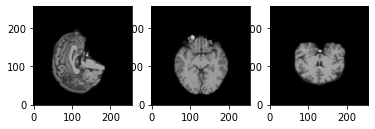

In [7]:
slice_0 = img[128, :, :]
slice_1 = img[:, 128, :]
slice_2 = img[:, :, 128]
show_slices([slice_0, slice_1, slice_2])

# Will 3D Conv Work?
and yes. it should be $(batch size, Channels, width, height, depth)$ like tensors though.

In [8]:
import torch
import torch.nn as nn

In [10]:
x = torch.Tensor(img)[None, None, :, :, :]

In [11]:
layer1 = nn.Conv3d(1, 1, 3, stride=2)

In [12]:
output = layer1(x)
output

tensor([[[[[-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           ...,
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932]],

          [[-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           ...,
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932]],

          [[-0.0932, -0.0932, -0.0932,  ..., -0.0932, -0.0932, -0.0932],
           [-0.

# Will Loading this won't hurt?
try this after making the directory available offline.

In [13]:
from tqdm.notebook import tqdm


def image(path="../../brainmask_nii/"):

    PATH = path
    files = glob(PATH + "/*.nii")

    out = []
    for file in tqdm(files):
        file = nib.load(file).get_fdata()
        out.append(file)
        # out.append(file.transpose(2, 0, 1))

    out = np.array(out)

    return torch.tensor(out, dtype=torch.float)

In [ ]:
%time X = image()

# Handling Sparse Matrix

In [13]:
%%time
X = nib.load(nii[3]).get_fdata()

len(np.where(X == 0.0)[0]) / (256 * 256 * 256) * 100

Wall time: 658 ms


89.68612551689148

In [14]:
class NDSparseMatrix:
    def __init__(self):
        self.elements = {}

    def addValue(self, tuple, value):
        self.elements[tuple] = value

    def readValue(self, tuple):
        try:
            value = self.elements[tuple]
        except KeyError:
            # could also be 0.0 if using floats...
            value = 0
        return value

In [17]:
sparse = NDSparseMatrix()
for x, y, z in zip(*np.where(X != 0)):
    sparse.addValue((x, y, z), X[x, y, z])

In [19]:
sparse.readValue((x, y, z))

9.0

In [23]:
np.array(X).max()

200.0

In [24]:
np.array(X).min()

0.0